# Author: Talha Ali Khan

# Project: SER (Speech Emotion Recognition)

# Importing Libraries

In [ ]:
import librosa
import soundfile as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import glob

# Feature Extraction

In [ ]:
c1 = True # MFCC
c2 = True # Chroma
c3 = True # Mel Spectrogram
c4 = True # Contrast Spectrogram
c5 = True # Tonnetz

In [ ]:
def extractFeatures(file):    
    with sf.SoundFile(file) as sound_file:  
            
        features = np.array([])

        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        if(c2 or c4):
            stft = np.abs(librosa.stft(X))

        if(c1):
            MFCC_Features = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=47).T, axis=0)
            features = np.hstack((features, MFCC_Features))

        if(c2):
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            features = np.hstack((features, chroma))

        if(c3):
            y, sr = librosa.load(librosa.ex(sound_file))
            mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
            features = np.hstack((features, mel))

        if(c4):
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            features = np.hstack((features, contrast))

        if(c5):
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            features = np.hstack((features, tonnetz))
    
    return features

In [ ]:
def extractTrainData():
    X, y = [], []
    l = os.listdir('SERDataset/Train')   
    for label in l:     
        for file in glob.glob("SERDataset/Train/" + label + "/*.wav"):    

            # get the emotion label    
            emotion = label

            # extract speech features
            features = extractFeatures(file)     
            
            # add to data
            X.append(features)
            y.append(emotion)   
        
    return X,y

In [ ]:
X1, y1 = [], []
X1, y1 = extractTrainData()

In [ ]:
def extractTestData():
    X, y = [], []
    l = os.listdir('SERDataset/Test')   
    for label in l:     
        for file in glob.glob("SERDataset/Test/" + label + "/*.wav"):    

            # get the emotion label    
            emotion = label

            # extract speech features
            features = extractFeatures(file)            
            # add to data
            X.append(features)
            y.append(emotion)   
        
    return X,y

In [ ]:
X2, y2 = [], []
X2, y2 = extractTestData()

In [ ]:
print('Features Extracted')
print('1. MFCC')
print('2. Chroma')
print('3. Mel Spectrogram')
print('4. Contrast Spectrogram')
print('5. Tonnetz')

Features Extracted
1. MFCC
2. Chroma
3. Mel Spectrogram
4. Contrast Spectrogram
5. Tonnetz


# Train

### Splitting data into test and train

In [ ]:
X_train = np.array(X1)
y_train = np.array(y1)

In [ ]:
X_test = np.array(X2)
y_test = np.array(y2)

### Training Model

In [ ]:
# from sklearn.svm import SVC # "Support vector classifier"
# model = SVC(kernel='linear', C=1E10)
# model.fit(X_train, y_train)

In [ ]:
# save model to disk
# pickle.dump(model, open("proj-model.csv", 'wb'))

# load the model from disk
model = pickle.load(open("proj-model.csv", 'rb'))

In [ ]:
y_model = model.predict(X_test)

# Graph

In [ ]:
data = X1 + X2
labels = y1 + y2

f_half = np.array(data).shape[1]
s_half = 0

if f_half % 2 == 0:
    f_half = s_half = int(f_half/2)
else:
    f_half = int(f_half/2)
    s_half = f_half + 1   
first_half , second_half = [], []

for audio in data:
    f1, f2 = [], []       
    for features in enumerate (audio):          
        if features[0] < f_half:
            f1.append(features[1])
        else:
            f2.append(features[1])
    
    first_half.append(np.mean(f1))
    second_half.append(np.mean(f2))
    
df = pd.DataFrame(first_half, columns = ['first_half'])
df['second_half'] = second_half
df['labels'] = labels    

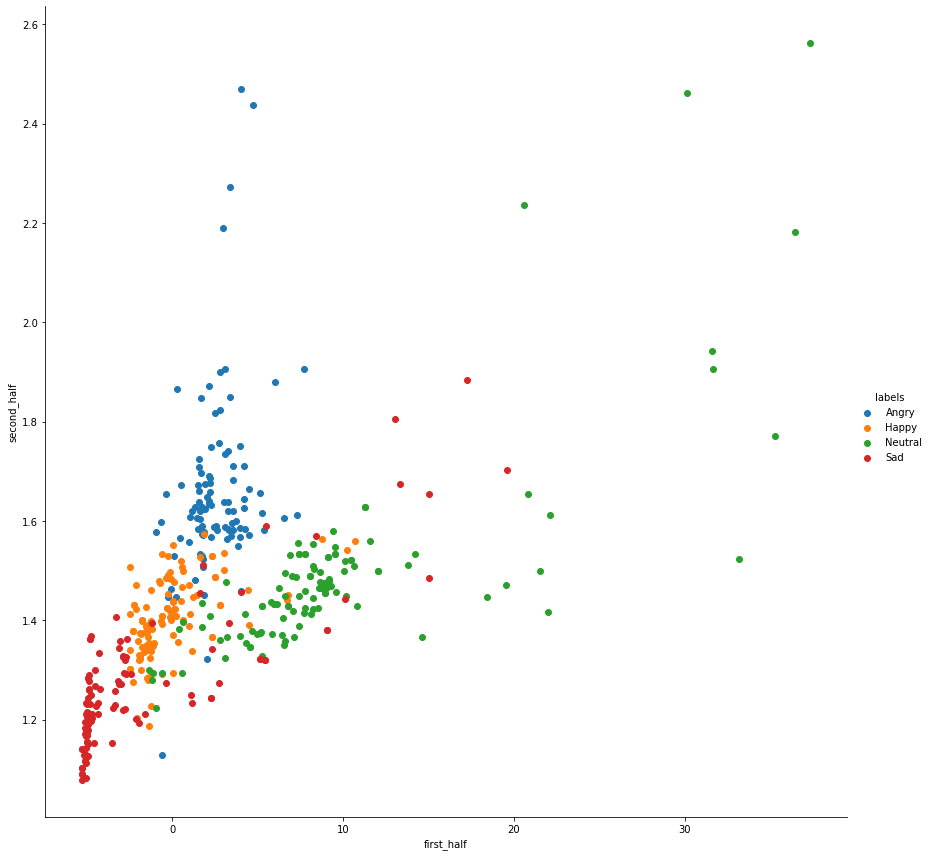

In [ ]:
sns.FacetGrid(df, hue ="labels", height = 12).map(plt.scatter, 'first_half', 'second_half').add_legend()
plt.savefig('scatterplot.png')

# Accuracy

### Cross Val Score

In [ ]:
x = X1 + X2
y = y1 + y2
X = np.array(x)
Y = np.array(y)

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, Y, cv = 5)

array([0.82022472, 0.80898876, 0.87640449, 0.97752809, 0.83146067])

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_model) * 100
print('Accuracy:', round(acc,2), '%')

Accuracy: 100.0 %


# Prediction

In [ ]:
def extractDataForPrediction():
    x = []              
    # extract speech features    
    file = 'SERDataset/Test/Sad/SM25_F34_S084.wav'    
    features = extractFeatures(file)        
    # add to data
    x.append(features)     
    return x

In [ ]:
X_test = extractDataForPrediction()

In [ ]:
prediction = model.predict(X_test)[0]
prediction

'Sad'